# June 25 - ConvaeNet

In [3]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

In [4]:
# Method to print the output shape given the layer parameters and input size

def print_conv_output(input_size, output_channels, kernel_size, stride,
                       padding, dilation):
    
    print("Input size : num_channels {0}, height {1}, width {2}".format(input_size[0],
                                                                        input_size[1],
                                                                        input_size[2]))
    
    output_height = (input_size[1] + 2*padding[0] - 
                               dilation[0]*(kernel_size[0] - 1) - 1)/stride[0] + 1
    
    output_width = (input_size[2] + 2*padding[1] - 
                               dilation[1]*(kernel_size[1] - 1) - 1)/stride[1] + 1
    
    
    print("Actual output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    output_height = math.floor(output_height)
    output_width = math.floor(output_width)
    
    print("Floor Output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    return (output_channels, output_height, output_width)

In [48]:
# Encoder
curr_size = (19,16,40)

# First feature extraction layer
print("Applying self.en_conv1")
curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(1,1), dilation=(1,1))

# First sub-sampling layer
curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(0,0), dilation=(1,1))

curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(0,0), dilation=(1,1))

curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(0,0), dilation=(1,1))

curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(0,0), dilation=(1,1))

Applying self.en_conv1
Input size : num_channels 19, height 16, width 40
Actual output size : num_channels 64, height 16.0, width 40.0
Floor Output size : num_channels 64, height 16, width 40
Input size : num_channels 64, height 16, width 40
Actual output size : num_channels 64, height 14.0, width 38.0
Floor Output size : num_channels 64, height 14, width 38
Input size : num_channels 64, height 14, width 38
Actual output size : num_channels 64, height 12.0, width 36.0
Floor Output size : num_channels 64, height 12, width 36
Input size : num_channels 64, height 12, width 36
Actual output size : num_channels 64, height 10.0, width 34.0
Floor Output size : num_channels 64, height 10, width 34
Input size : num_channels 64, height 10, width 34
Actual output size : num_channels 64, height 8.0, width 32.0
Floor Output size : num_channels 64, height 8, width 32


In [49]:
curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(2,2),
                              stride=(2,2), padding=(0,0), dilation=(1,1))

Input size : num_channels 64, height 8, width 32
Actual output size : num_channels 64, height 4.0, width 16.0
Floor Output size : num_channels 64, height 4, width 16


In [50]:
curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(2,2),
                              stride=(1,1), padding=(0,0), dilation=(1,1))

Input size : num_channels 64, height 4, width 16
Actual output size : num_channels 64, height 3.0, width 15.0
Floor Output size : num_channels 64, height 3, width 15


In [52]:
curr_size = print_conv_output(curr_size, output_channels=64, kernel_size=(3,3),
                              stride=(1,1), padding=(1,1), dilation=(1,1))

Input size : num_channels 64, height 2, width 14
Actual output size : num_channels 64, height 2.0, width 14.0
Floor Output size : num_channels 64, height 2, width 14


## Plotting the model performance

softmaxes shape :  (5000, 3)
labels shape :  (5000,)
predictions shape :  (5000,)
energies shape :  (5000,)


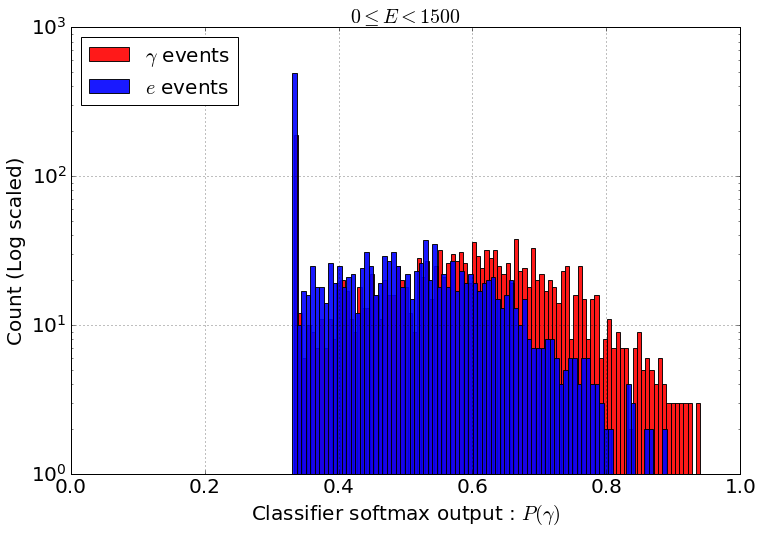

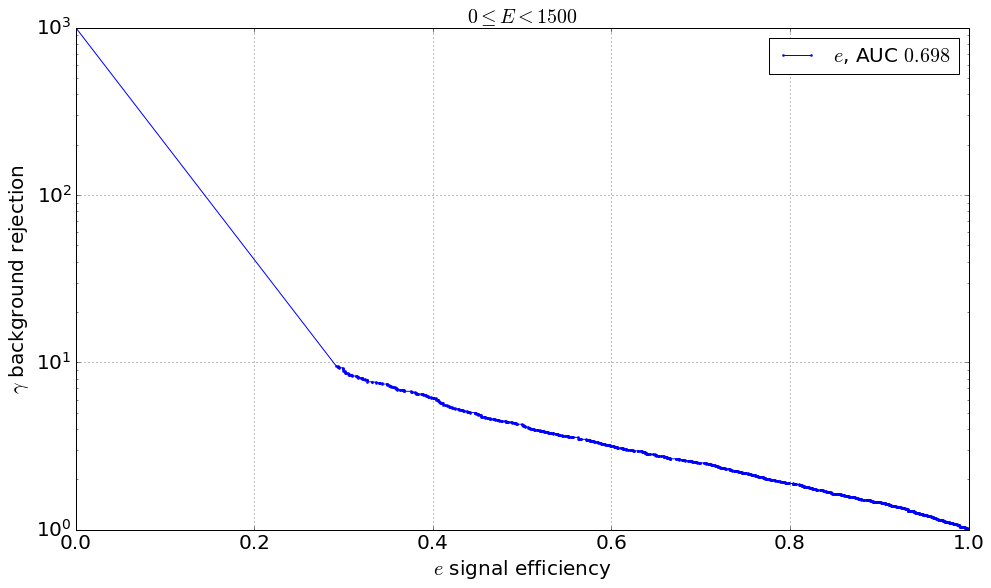

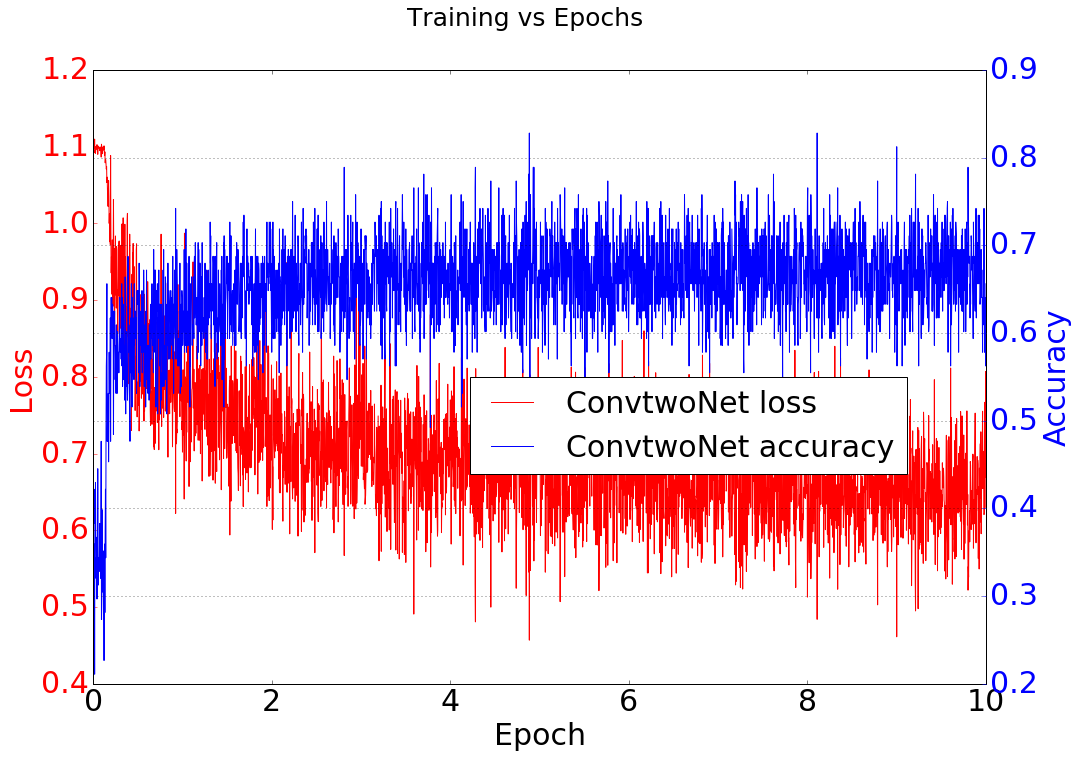

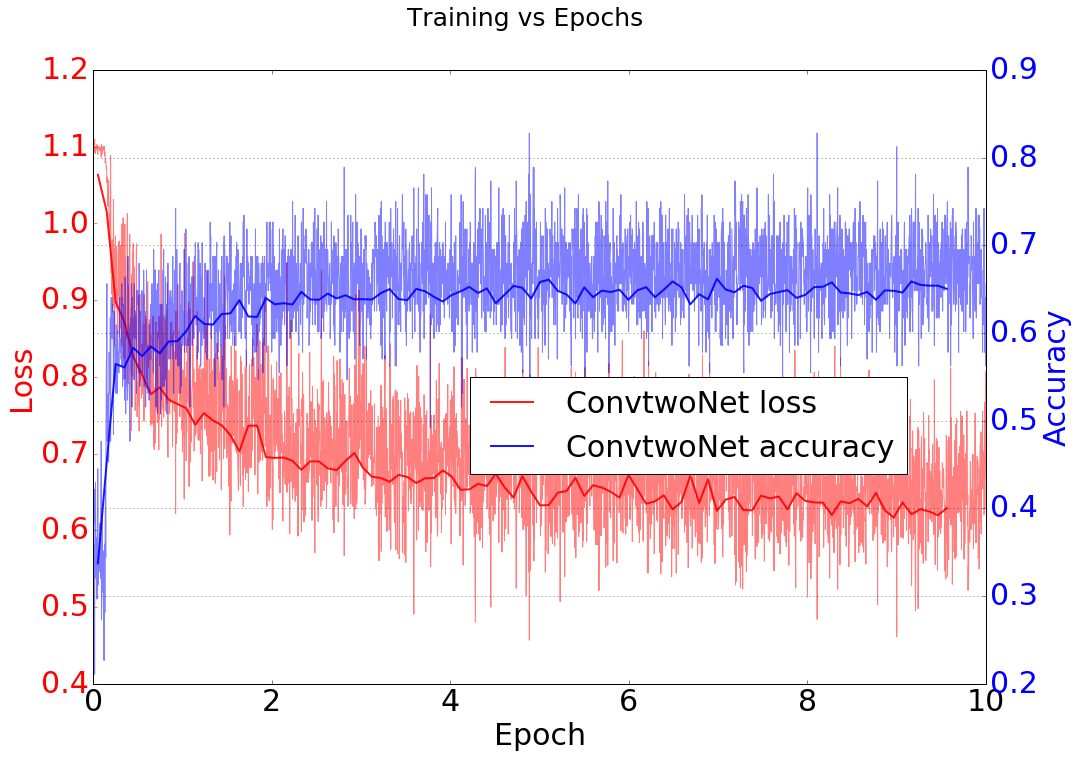

In [53]:
# Using the absolute path
run_id = "20190626_033235"
model_name = "ConvtwoNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"gamma":0}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)